<a href="https://colab.research.google.com/github/Nisarg619/Deep-Learning/blob/main/DL_PR02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

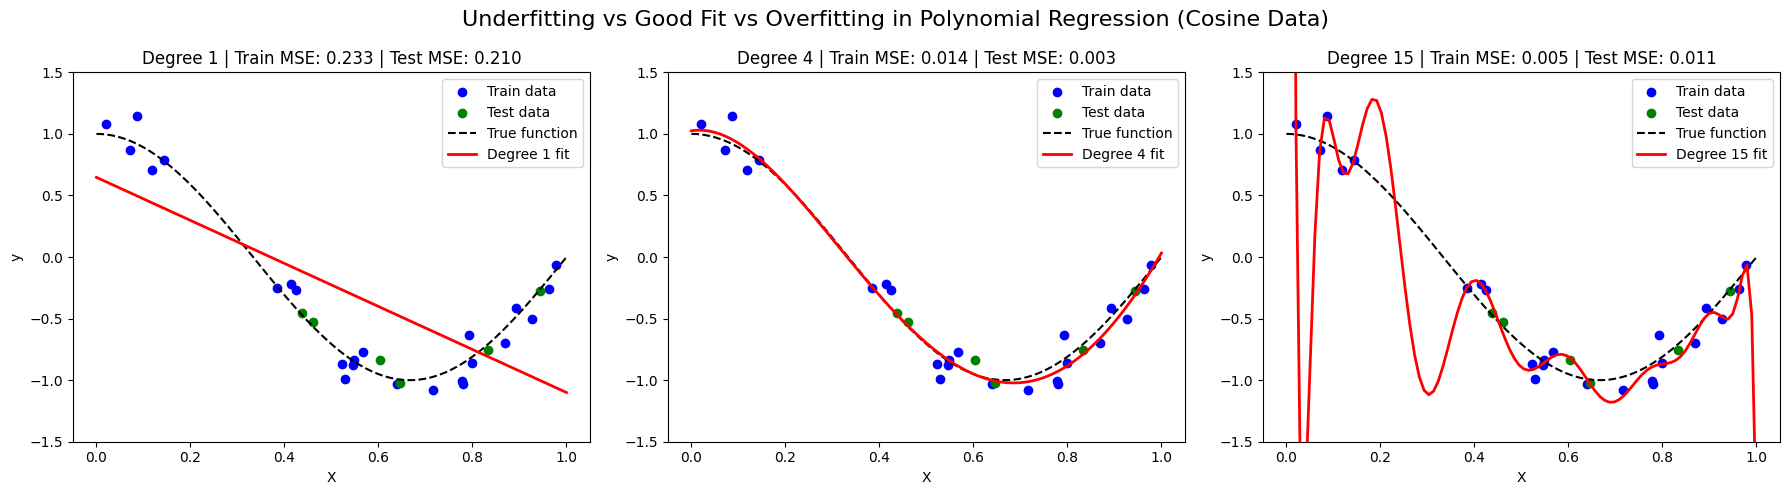

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
n_samples = 30
true_function = lambda X: np.cos(1.5 * np.pi * X)
x = np.sort(np.random.rand(n_samples))
y = true_function(x) + np.random.randn(n_samples) * 0.1

X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 4, 15]

plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='green', label='Test data')

    X_true = np.linspace(0, 1, 100).reshape(-1, 1)
    y_true = true_function(X_true)
    plt.plot(X_true, y_true, color='black', linestyle='dashed', label='True function')


    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))
    plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Degree {degree} fit')

    plt.title(f"Degree {degree} | Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.legend()

plt.suptitle("Underfitting vs Good Fit vs Overfitting in Polynomial Regression (Cosine Data)", fontsize=16)
plt.tight_layout()
plt.show()